In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import serial

In [60]:
# Create object serial port
portName = "COM6"                      # replace this port name by yours!
baudrate = 115200
ser = serial.Serial(portName,baudrate)


n = 1
y = np.zeros(0)

print("00")

while n <= 100:
    value = ser.readline()
    y = np.append(y,int(value))
    print(y)
    print(n)
    n+=1
print(y)    
print("end")


00
[821.]
1
[821. 997.]
2
[821. 997. 820.]
3
[821. 997. 820. 360.]
4
[821. 997. 820. 360. 657.]
5
[821. 997. 820. 360. 657. 879.]
6
[821. 997. 820. 360. 657. 879. 861.]
7
[821. 997. 820. 360. 657. 879. 861. 859.]
8
[821. 997. 820. 360. 657. 879. 861. 859. 836.]
9
[821. 997. 820. 360. 657. 879. 861. 859. 836. 840.]
10
[821. 997. 820. 360. 657. 879. 861. 859. 836. 840. 843.]
11
[821. 997. 820. 360. 657. 879. 861. 859. 836. 840. 843. 799.]
12
[821. 997. 820. 360. 657. 879. 861. 859. 836. 840. 843. 799. 837.]
13
[821. 997. 820. 360. 657. 879. 861. 859. 836. 840. 843. 799. 837. 844.]
14
[821. 997. 820. 360. 657. 879. 861. 859. 836. 840. 843. 799. 837. 844.
 817.]
15
[821. 997. 820. 360. 657. 879. 861. 859. 836. 840. 843. 799. 837. 844.
 817. 842.]
16
[821. 997. 820. 360. 657. 879. 861. 859. 836. 840. 843. 799. 837. 844.
 817. 842. 881.]
17
[821. 997. 820. 360. 657. 879. 861. 859. 836. 840. 843. 799. 837. 844.
 817. 842. 881. 855.]
18
[821. 997. 820. 360. 657. 879. 861. 859. 836. 840. 843. 7

[ 821.  997.  820.  360.  657.  879.  861.  859.  836.  840.  843.  799.
  837.  844.  817.  842.  881.  855.  840.  882.  921.  900.  961.  956.
  861.  922.  921.  865.  976.  943.  919.  925.  920.  881.  921.  960.
  900.  982. 1002.  879.  784.  380.  659.  861.  925.  920.  819.  864.
  858.  822.  840.  880.  843.  805.  877.]
55
[ 821.  997.  820.  360.  657.  879.  861.  859.  836.  840.  843.  799.
  837.  844.  817.  842.  881.  855.  840.  882.  921.  900.  961.  956.
  861.  922.  921.  865.  976.  943.  919.  925.  920.  881.  921.  960.
  900.  982. 1002.  879.  784.  380.  659.  861.  925.  920.  819.  864.
  858.  822.  840.  880.  843.  805.  877.  841.]
56
[ 821.  997.  820.  360.  657.  879.  861.  859.  836.  840.  843.  799.
  837.  844.  817.  842.  881.  855.  840.  882.  921.  900.  961.  956.
  861.  922.  921.  865.  976.  943.  919.  925.  920.  881.  921.  960.
  900.  982. 1002.  879.  784.  380.  659.  861.  925.  920.  819.  864.
  858.  822.  840.  880.

[ 821.  997.  820.  360.  657.  879.  861.  859.  836.  840.  843.  799.
  837.  844.  817.  842.  881.  855.  840.  882.  921.  900.  961.  956.
  861.  922.  921.  865.  976.  943.  919.  925.  920.  881.  921.  960.
  900.  982. 1002.  879.  784.  380.  659.  861.  925.  920.  819.  864.
  858.  822.  840.  880.  843.  805.  877.  841.  800.  821.  861.  824.
  778.  839.  861.  803.  817.  841.  901.  823.  898.  878.  821.  863.
  898.  805.  857.  899.]
76
[ 821.  997.  820.  360.  657.  879.  861.  859.  836.  840.  843.  799.
  837.  844.  817.  842.  881.  855.  840.  882.  921.  900.  961.  956.
  861.  922.  921.  865.  976.  943.  919.  925.  920.  881.  921.  960.
  900.  982. 1002.  879.  784.  380.  659.  861.  925.  920.  819.  864.
  858.  822.  840.  880.  843.  805.  877.  841.  800.  821.  861.  824.
  778.  839.  861.  803.  817.  841.  901.  823.  898.  878.  821.  863.
  898.  805.  857.  899.  821.]
77
[ 821.  997.  820.  360.  657.  879.  861.  859.  836.  840.

[ 821.  997.  820.  360.  657.  879.  861.  859.  836.  840.  843.  799.
  837.  844.  817.  842.  881.  855.  840.  882.  921.  900.  961.  956.
  861.  922.  921.  865.  976.  943.  919.  925.  920.  881.  921.  960.
  900.  982. 1002.  879.  784.  380.  659.  861.  925.  920.  819.  864.
  858.  822.  840.  880.  843.  805.  877.  841.  800.  821.  861.  824.
  778.  839.  861.  803.  817.  841.  901.  823.  898.  878.  821.  863.
  898.  805.  857.  899.  821.  858.  900.  842.  858.  885.  915.  822.
  860.  896.  863.  818.  883.  918.  840.  895.]
92
[ 821.  997.  820.  360.  657.  879.  861.  859.  836.  840.  843.  799.
  837.  844.  817.  842.  881.  855.  840.  882.  921.  900.  961.  956.
  861.  922.  921.  865.  976.  943.  919.  925.  920.  881.  921.  960.
  900.  982. 1002.  879.  784.  380.  659.  861.  925.  920.  819.  864.
  858.  822.  840.  880.  843.  805.  877.  841.  800.  821.  861.  824.
  778.  839.  861.  803.  817.  841.  901.  823.  898.  878.  821.  863

In [42]:
n = 101
s = "821.  997.  820.  360.  657.  879.  861.  859.  836.  840.  843.  799.  837.  844.  817.  842.  881.  855.  840.  882.  921.  900.  961.  956.  861.  922.  921.  865.  976.  943.  919.  925.  920.  881.  921.  960.  900.  982. 1002.  879.  784.  380.  659.  861.  925.  920.  819.  864.  858.  822.  840.  880.  843.  805.  877.  841.  800.  821.  861.  824.  778.  839.  861.  803.  817.  841.  901.  823.  898.  878.  821.  863.  898.  805.  857.  899.  821.  858.  900.  842.  858.  885.  915.  822.  860.  896.  863.  818.  883.  918.  840.  895.  860.  842.  917.  920.  838.  881.  901.  819."
print(s.replace('.', ','))
y = np.array([821,  997,  820,  820,  657,  879,  861,  859,  836,  840,  843,  799,  837,  844,  817,  842,  881,  855,  840,  882,  921,  900,  961,  956,  861,  922,  921,  865,  976,  943,  919,  925,  920,  881,  921,  960,  900,  982, 1002,  879,  784,  784,  659,  861,  925,  920,  819,  864,  858,  822,  840,  880,  843,  805,  877,  841,  800,  821,  861,  824,  778,  839,  861,  803,  817,  841,  901,  823,  898,  878,  821,  863,  898,  805,  857,  899,  821,  858,  900,  842,  858,  885,  915,  822,  860,  896,  863,  818,  883,  918,  840,  895,  860,  842,  917,  920,  838,  881,  901,  819])
print(n)
print(y)
x = np.linspace(0, n-2,n-1)
print(x)

821,  997,  820,  360,  657,  879,  861,  859,  836,  840,  843,  799,  837,  844,  817,  842,  881,  855,  840,  882,  921,  900,  961,  956,  861,  922,  921,  865,  976,  943,  919,  925,  920,  881,  921,  960,  900,  982, 1002,  879,  784,  380,  659,  861,  925,  920,  819,  864,  858,  822,  840,  880,  843,  805,  877,  841,  800,  821,  861,  824,  778,  839,  861,  803,  817,  841,  901,  823,  898,  878,  821,  863,  898,  805,  857,  899,  821,  858,  900,  842,  858,  885,  915,  822,  860,  896,  863,  818,  883,  918,  840,  895,  860,  842,  917,  920,  838,  881,  901,  819,
101
[ 821  997  820  820  657  879  861  859  836  840  843  799  837  844
  817  842  881  855  840  882  921  900  961  956  861  922  921  865
  976  943  919  925  920  881  921  960  900  982 1002  879  784  784
  659  861  925  920  819  864  858  822  840  880  843  805  877  841
  800  821  861  824  778  839  861  803  817  841  901  823  898  878
  821  863  898  805  857  899  821  858  

In [33]:
ser.close()

NameError: name 'ser' is not defined

101
101


Text(0, 0.5, 'RRI(msec)')

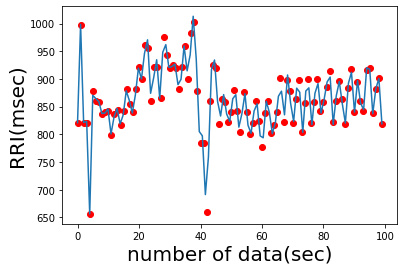

In [43]:
plt.plot(x, y, 'ro')
f = interpolate.interp1d(x, y, kind='cubic')
u = np.linspace(0, n-2, num=101)
print(len(f(u)))
print(len(u))
plt.plot(u, f(u),'-')
plt.xlabel("number of data(sec)", fontsize=20)
plt.ylabel("RRI(msec)", fontsize=20)

[ 65.68        80.79755673  68.75793671  72.69369292  62.1869895
  89.61471876  97.65845722 107.05352528 115.62488858 128.2950086
 143.42972027 150.22143301 172.20602566 192.92352748 204.66688724
 228.12859853 261.36393321 278.01726131 292.57691753 327.41676672
 370.93486009 388.41084467 435.35651043 474.62807693 452.86238452
 493.61016899 538.76604779 523.75567067 601.35459147 637.33240138
 635.72203524 661.8436255  689.77833773 685.10937213 714.7676482
 785.46490184 769.44052892 813.74804248 894.40253551 843.55838694
 739.65694434 745.2486401  655.8944469  729.57263199 891.24943997
 916.71826577 849.93190886 828.23393542 869.92183104 836.29218135
 823.2812577  862.45434152 866.52062664 803.81784236 821.63247871
 849.25832845 785.0339931  760.89295832 787.0697777  785.74529734
 718.7118075  700.75576622 741.46218663 706.70430023 655.93658409
 652.90460886 668.94773898 653.40715424 599.46370935 626.34120315
 567.26795078 522.18754591 534.82277051 504.98380871 439.71693904
 454.98543423

Text(0, 0.5, 'amplitude spectrum')

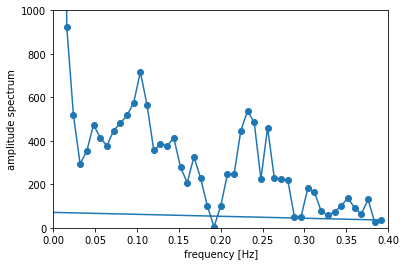

In [46]:
start = 0   # サンプリングする開始位置
N = n-1     # FFTのサンプル数
fs = 0.8
x =  f(u)
# 窓関数
hammingWindow = np.hamming(N)
windowedData = hammingWindow * x[start:start+N]
print(windowedData)
windowedDFT = np.fft.fft(windowedData)
print(windowedDFT)
freqList = np.fft.fftfreq(N, d=1.0/fs)
windowedAmp = [np.sqrt(c.real ** 2 + c.imag ** 2) for c in windowedDFT]
print(windowedAmp)
# 振幅スペクトルを描画（窓関数あり）
plt.plot(freqList, windowedAmp, marker='o', linestyle='-')
plt.axis([0, fs/2, 0, 1000])
plt.xlabel("frequency [Hz]")
plt.ylabel("amplitude spectrum")

[0, 0.4, 0, 1000]

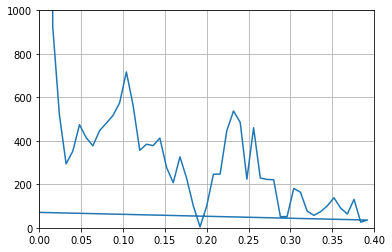

In [77]:
w = interpolate.interp1d(freqList, windowedAmp, kind='cubic', fill_value="extrapolate")

plt.grid()
plt.plot(freqList, windowedAmp)
plt.axis([0, fs/2, 0, 1000])